<a href="https://colab.research.google.com/github/beatrizmilitelop/analises-e-visualizacao-de-dados/blob/main/movies_and_ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliotecas

In [ ]:
!pip install seaborn==0.12.2
!pip install wordcloud

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud


In [ ]:
import seaborn as sns

print(sns.__version__)

0.12.2


## Tabelas e dados

In [ ]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# Dados
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]

# Extrair os gêneros, dividir e criar um conjunto de gêneros únicos
generos_unicos = set()
for generos in filmes['generos']:
    generos_lista = generos.split("|")
    generos_unicos.update(generos_lista)

# Transformar o conjunto de gêneros únicos de volta em uma lista
generos_unicos = list(generos_unicos)

# Unir a lista de gêneros em uma única string
generos_string = ",".join(generos_unicos)

print(generos_string)

War,Romance,Fantasy,Adventure,Action,Children,Western,Drama,Horror,Film-Noir,Comedy,Thriller,(no genres listed),Documentary,Musical,IMAX,Mystery,Animation,Crime,Sci-Fi


In [ ]:
# Tirar a média de cada avalianção por filme
notas.groupby("filmeId")
medias_por_filmes = notas.groupby("filmeId").mean().nota
medias_por_filmes.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

## Gráficos

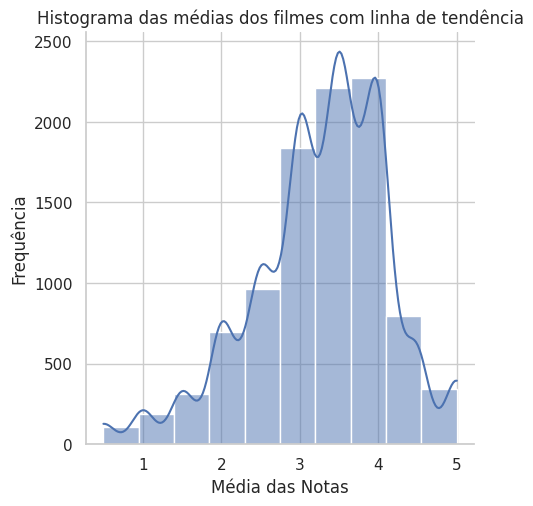

In [ ]:
# Histograma de média de notas por filmes

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar o histograma usando o Seaborn
sns.displot(data=medias_por_filmes, bins=10, kde=True)  # KDE ativa a estimativa de densidade do kernel
plt.title("Histograma das médias dos filmes com linha de tendência")
plt.xlabel("Média das Notas")
plt.ylabel("Frequência")
plt.show()


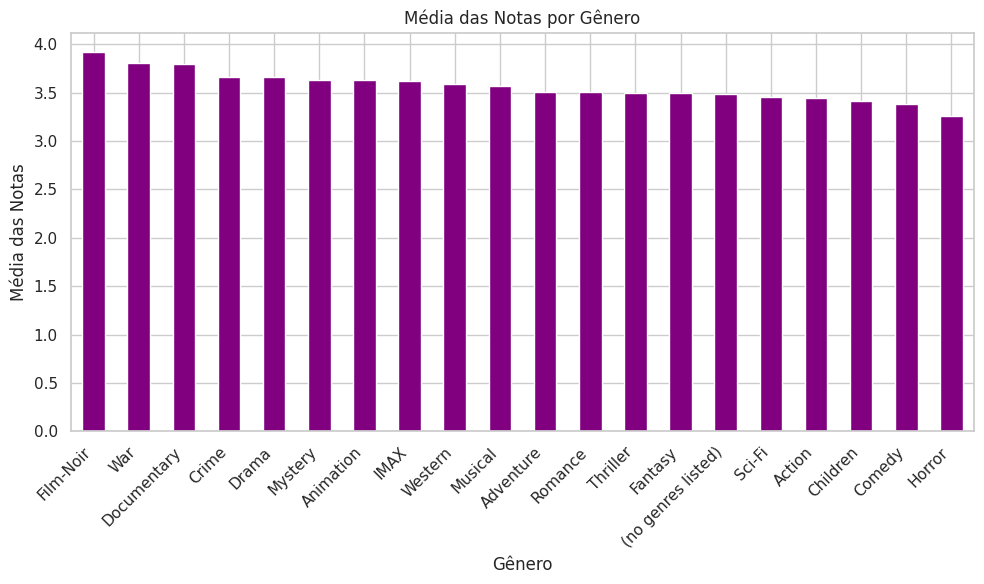

In [ ]:
# Carregar os dados
notas = pd.read_csv("ratings.csv")
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]

# Unir as tabelas 'notas' e 'filmes' usando 'filmeId'
data = pd.merge(notas, filmes, on="filmeId")

# Explodir a coluna de gêneros
data['generos'] = data['generos'].str.split('|')
data = data.explode('generos')

# Calcular a média das notas por gênero
media_por_genero = data.groupby('generos')['nota'].mean()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
media_por_genero.sort_values(ascending=False).plot(kind='bar', color='purple')
plt.xlabel('Gênero')
plt.ylabel('Média das Notas')
plt.title('Média das Notas por Gênero')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

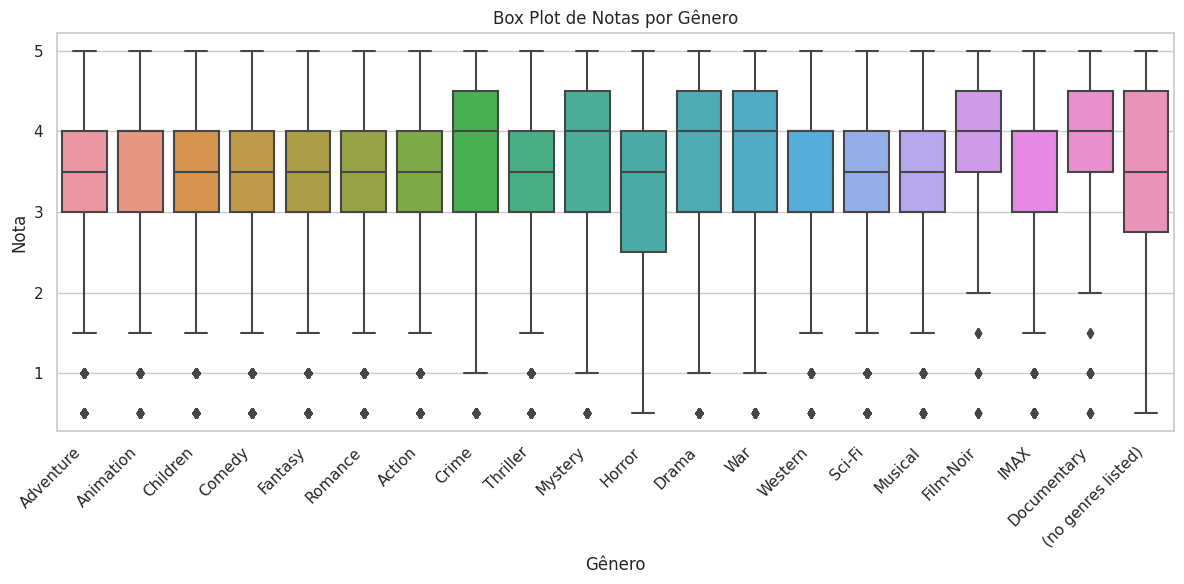

In [ ]:
# Carregar os dados
notas = pd.read_csv("ratings.csv")
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]

# Unir as tabelas 'notas' e 'filmes' usando 'filmeId'
data = pd.merge(notas, filmes, on="filmeId")

# Explodir a coluna de gêneros
data['generos'] = data['generos'].str.split('|')
data = data.explode('generos')

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar o box plot usando o Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['generos'], y=data['nota'])
plt.xlabel('Gênero')
plt.ylabel('Nota')
plt.title('Box Plot de Notas por Gênero')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


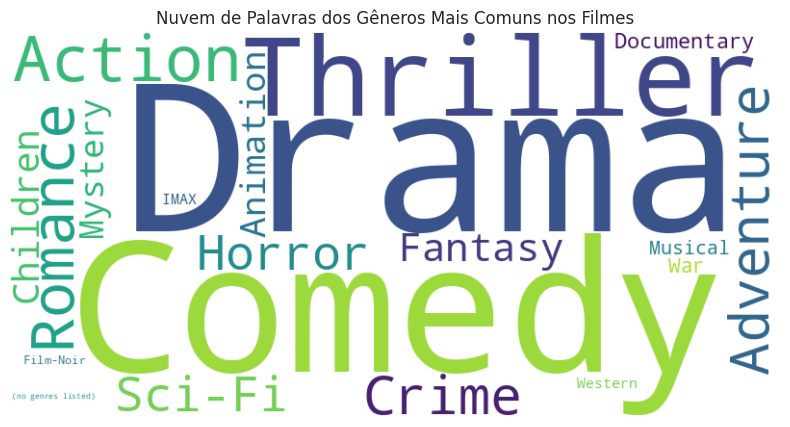

In [ ]:
# Carregar os dados
notas = pd.read_csv("ratings.csv")
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]

# Processar os gêneros para contar a frequência
generos_contagem = filmes['generos'].str.split('|').explode().value_counts()

# Criar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(generos_contagem)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras dos Gêneros Mais Comuns nos Filmes')
plt.show()
